<a href="https://colab.research.google.com/github/PriyankaRaii/Python_Projects/blob/main/Salary_Tier_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading the data**

In [ ]:
import pandas as pd

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/python Datasets /SalaryData.csv'
SalaryData=pd.read_csv(path)

## **Data description**

The business meaning of each column in the data is as below

* age: Age of the employee
* workclass: Which type of organization the employee works in? State-gov/
  Private etc.
* fnlwgt: final weight, which is the number of units in the target population * that the responding unit represents
* education: The highest education of the employee
* education_num: numeric code for the highest education of the employee
* marital_status: The marital status of the employee
* occupation: The type of job
* relationship: Type of relationship in? Husband, wife etc.
* race: Which race the employee belongs to
* sex: Gender of the employee
* capital_gain: How much capital gains does the employee gets in an year
* capital.loss: How much capital loss does the employee bears in an year
* hours_per_week: How many hours the employee works in a week?
* native_country: Which country the employee is working?
* SalaryGT50K: Is the salary greater than $50,000K or not

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

print('Database before deleting duplicate values:', SalaryData.shape)

SalaryData=SalaryData.drop_duplicates()
print('Database after deleting duplicate values:',SalaryData.shape)

Database before deleting duplicate values: (32561, 15)
Database after deleting duplicate values: (32537, 15)


**Defining the problem statement:**

Create a Predictive model which helps to categories the employee deserves a salary greater than 50,000 dollars or not?

**Target Variable:** SalaryGT50K

* SalaryGT50K=0 The employee earns less than 50,000 dollars in a year

* SalaryGT50K=1 The employee earns more than 50,000 dollars in a year

**Predictors:** age, workclass, education, marital_status, occupation etc.

**## Determining the type of Machine Learning**

Based on the problem statement we can understand that we need to create a supervised ML **classification model**, as the target variable is categorical

## **Basic Data Exploration**

In [ ]:
SalaryData.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  SalaryGT50K     32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [ ]:
SalaryData.describe()

,age,fnlwgt,education_num,capital_gain,capital.loss,hours_per_week,SalaryGT50K
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585887,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.625962,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
SalaryData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital.loss         92
hours_per_week       94
native_country       42
SalaryGT50K           2
dtype: int64

## **Basic Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

* age: Continuous. Selected.
* workclass: Categorical. Selected.
* fnlwgt: Continuous. Selected.
* education: Categorical. Selected.
* education_num: Categorical. Selected.
* marital_status: Categorical. Selected.
* occupation: Categorical. Selected.
* relationship: Categorical. Selected.
* race: Categorical. Selected.
* sex: Categorical. Selected.
* capital_gain: Continuous. Selected.
* capital.loss: Continuous. Selected.
* hours_per_week: Continuous. Selected.
* native_country: Categorical. Selected.
* SalaryGT50K: Categorical. Selected. This is the Target Variable!

### **Univariate analysis**  for Categorical Columns


<Axes: xlabel='SalaryGT50K'>

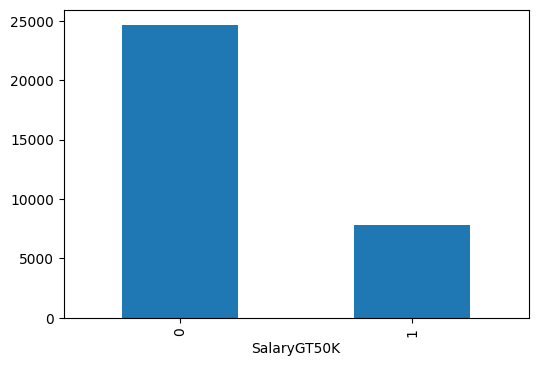

In [ ]:
%matplotlib inline
GroupedSalary=SalaryData.groupby('SalaryGT50K').size()
GroupedSalary.plot(kind='bar', figsize=(6,4))
# Target Variable: SalaryGT50K
#SalaryGT50K=0 The employee earns less than 50,000 dollars in a year
#SalaryGT50K=1 The employee earns more than 50,000 dollars in a year

In [ ]:
def PlotCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt
  fig, subPlot=plt.subplots(nrows=1,ncols=len(colsToPlot),figsize=(25,8))
  fig.suptitle('Bar charts of:'+ str(colsToPlot))

  for ColumnName, PlotNumber in zip(colsToPlot, range(len(colsToPlot))):
     inpData.groupby(ColumnName).size().plot(kind='bar', ax=subPlot[PlotNumber])

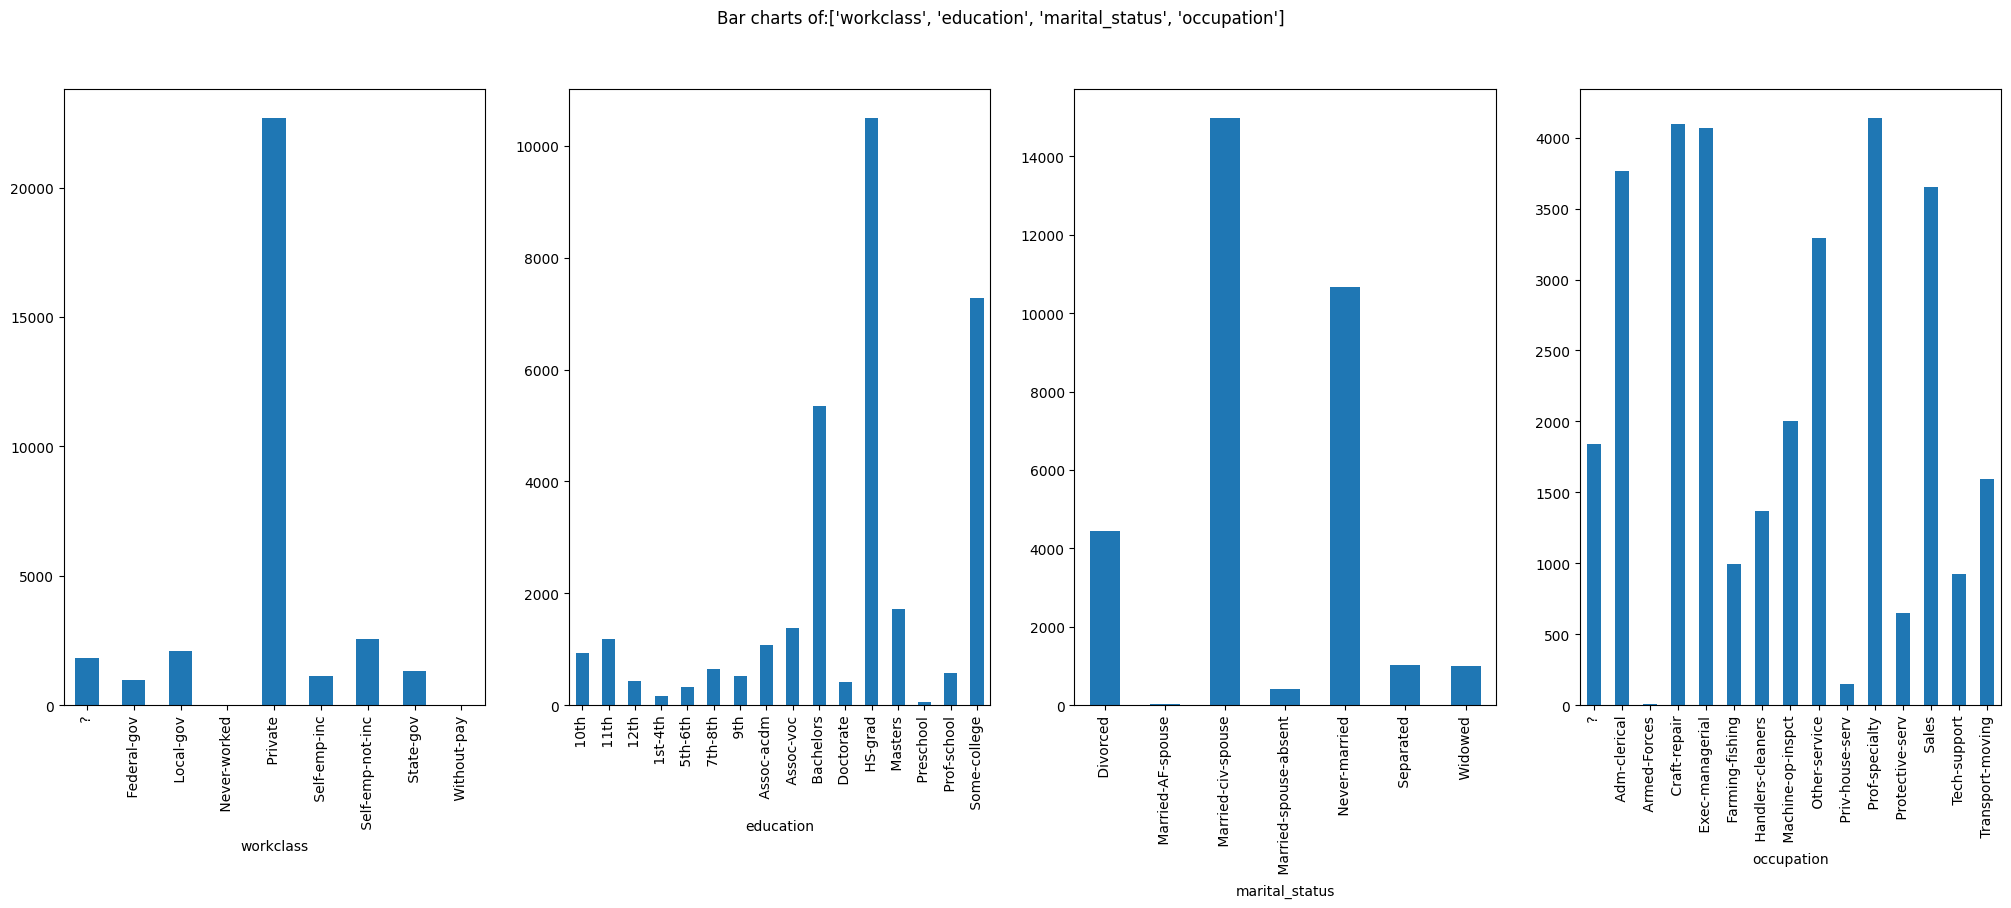

In [ ]:
PlotCharts(inpData=SalaryData, colsToPlot=['workclass', 'education', 'marital_status','occupation'])

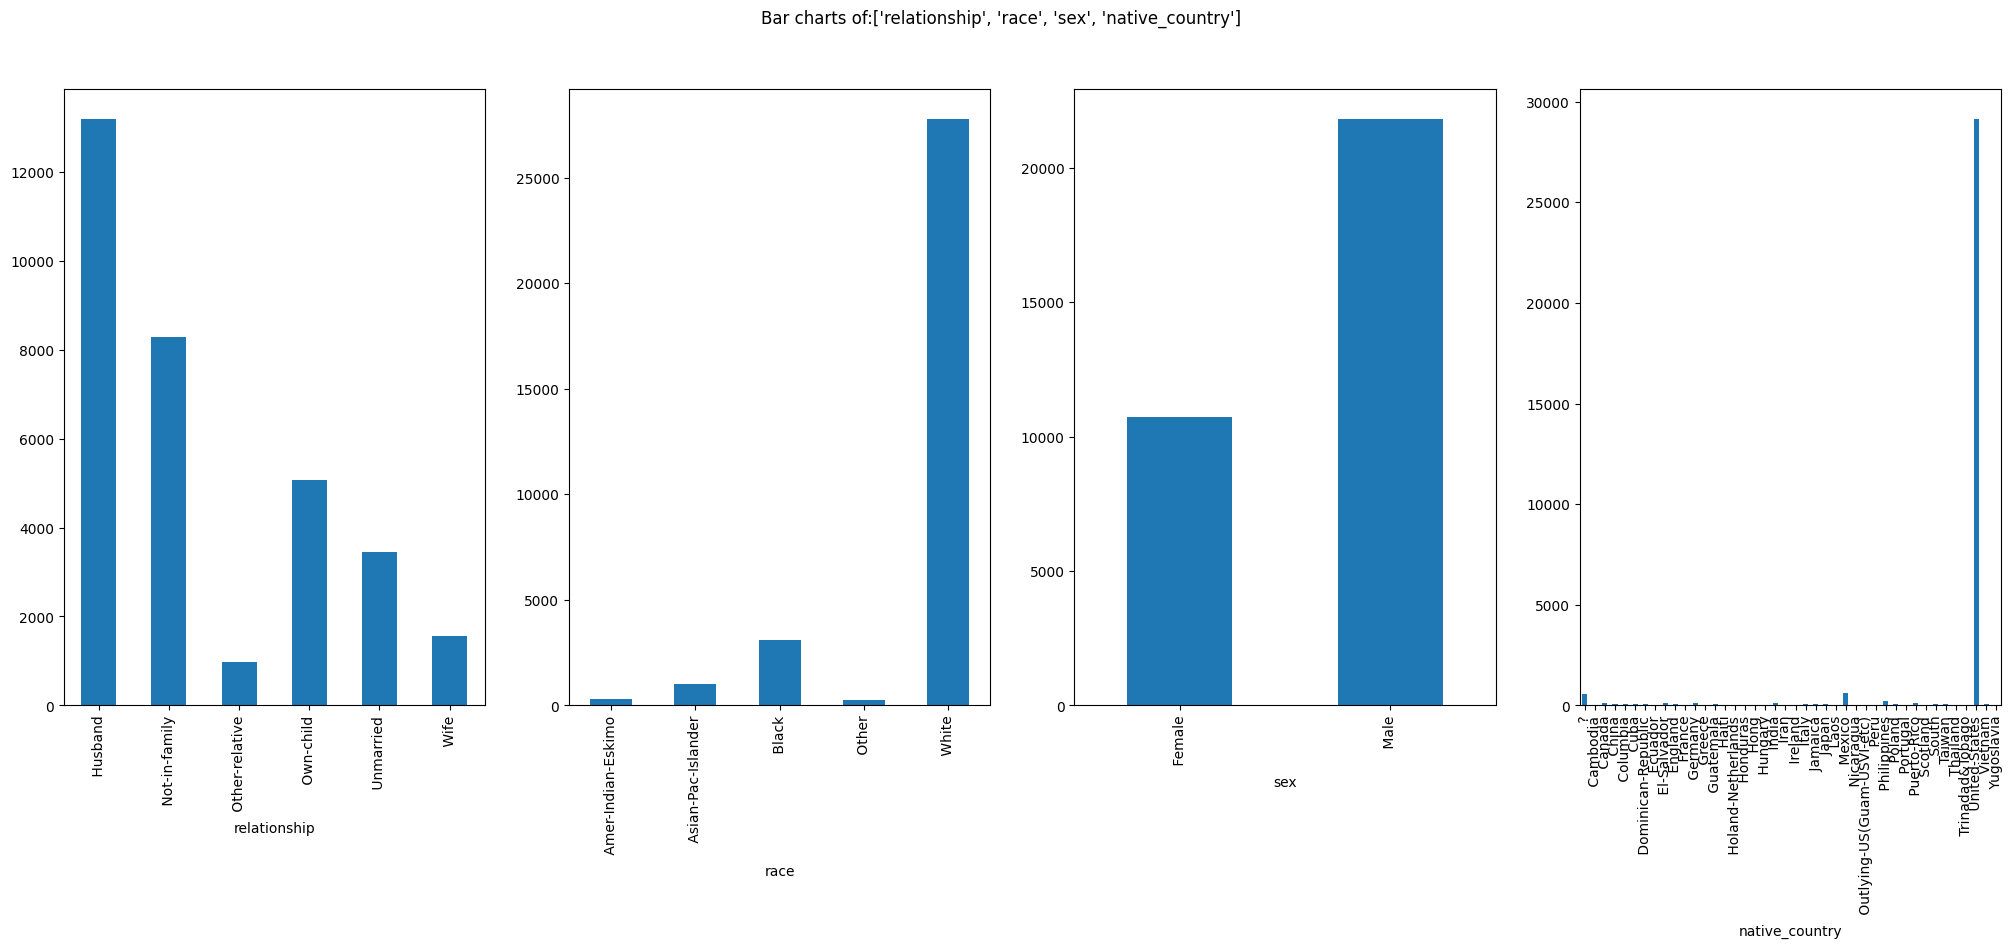

In [ ]:
PlotCharts(inpData=SalaryData,colsToPlot=['relationship', 'race', 'sex', 'native_country'])


**Selected Categorical Variables** : 'workclass', 'education', 'marital_status','occupation', 'relationship', 'race', 'sex' as these columns have satisfactory distribution **except** "native_country"

## **Univariate analysis** for Continuous columns

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital.loss'}>],
       [<Axes: title={'center': 'hours_per_week'}>, <Axes: >]],
      dtype=object)

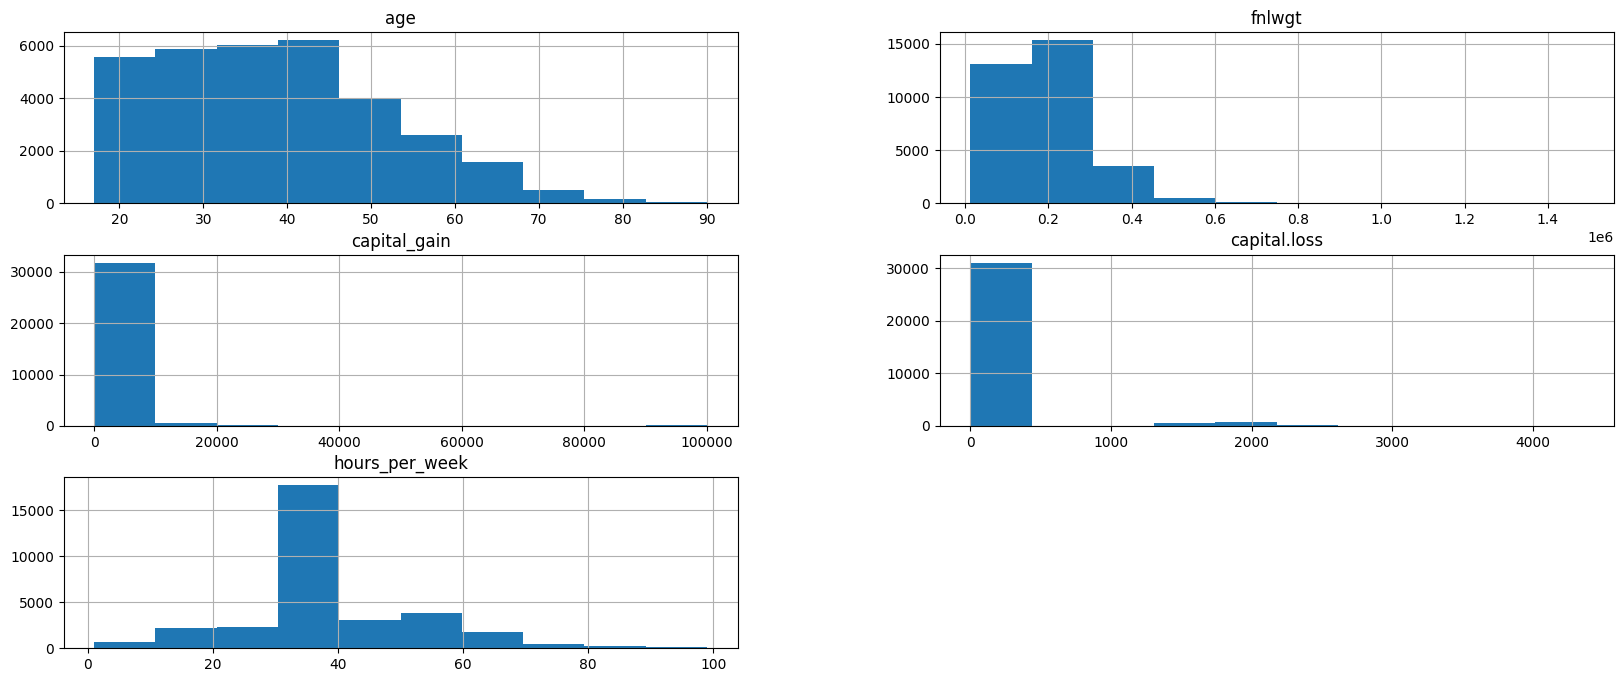

In [ ]:
SalaryData.hist(['age', 'fnlwgt','capital_gain','capital.loss','hours_per_week'], figsize=(20,8))

**Selected Continuous Variables:**

* age : Selected.
* fnlwgt: Selected. Outliers seen beyond 600000, need to treat them.
* capital_gain: Selected. Outliers seen beyond 40000, need to treat them.
* capital.loss: Selected. Outliers seen beyond 1000, need to treat them.
* hours_per_week: Selected. Distribution looks good.

## **Outlier treatment**


**Treating outlier in fnlwgl column**

In [ ]:
SalaryData['fnlwgt'][SalaryData['fnlwgt']>599000].sort_values()

23600     599629
22570     602513
28641     604045
29347     604380
6852      604506
          ...   
8258     1226583
15569    1268339
16739    1366120
18138    1455435
14449    1484705
Name: fnlwgt, Length: 143, dtype: int64

The nearest value to 600,000 is 599,629, so we'll replace all values above 600,000 with 599,629.

In [ ]:
SalaryData['fnlwgt'][SalaryData['fnlwgt']>600000] = 599629

**Treating outlier in 'capital_gain' column**

In [ ]:
SalaryData['capital_gain'][SalaryData['capital_gain']>40000].sort_values()

6433     41310
20176    41310
20987    99999
21188    99999
21489    99999
         ...  
12062    99999
12093    99999
12141    99999
32238    99999
32518    99999
Name: capital_gain, Length: 161, dtype: int64

In [ ]:
SalaryData['capital_gain'][SalaryData['capital_gain']>40000] = 41310

**Treating outlier in 'capital_loss' column**

In [ ]:
SalaryData['capital.loss'][SalaryData['capital.loss']<1000].sort_values(ascending=False)

11043    974
7032     974
32500    880
11442    880
4424     880
        ... 
10850      0
10849      0
10848      0
10847      0
32560      0
Name: capital.loss, Length: 31054, dtype: int64

In [ ]:
SalaryData['capital.loss'][SalaryData['capital.loss']>1000] = 974

## **Visualizing distribution after outlier treatment**

array([[<Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital.loss'}>, <Axes: >]], dtype=object)

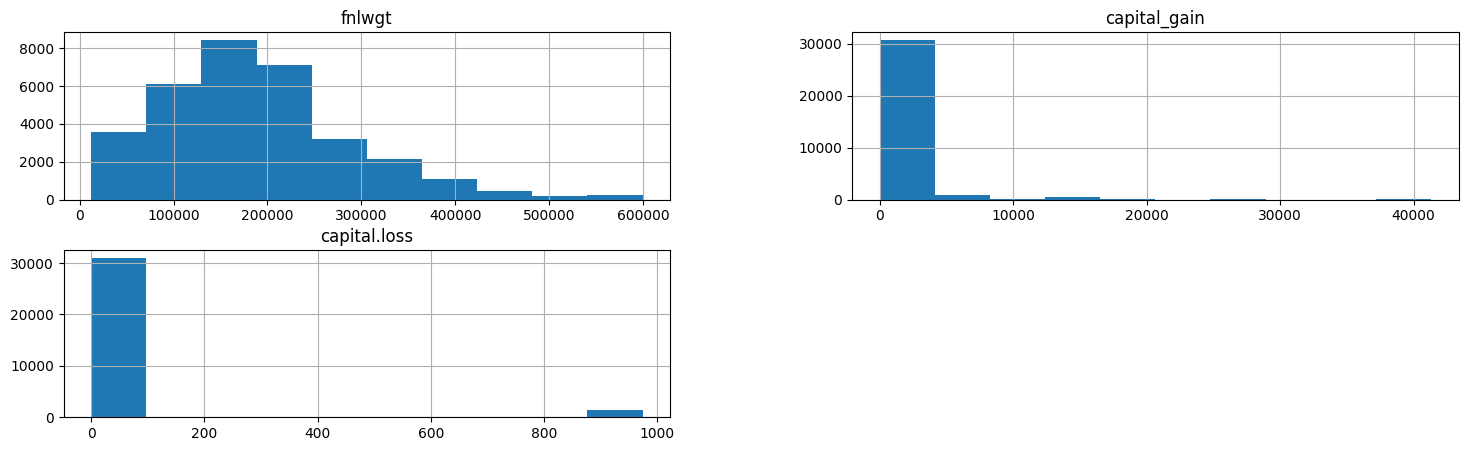

In [ ]:
SalaryData.hist(['fnlwgt','capital_gain','capital.loss'], figsize=(18,5))

## **Missing values treatment**


In [ ]:
SalaryData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital.loss      0
hours_per_week    0
native_country    0
SalaryGT50K       0
dtype: int64

## **Feature Selection**
The best columns(Features) which are correlated to the Target variable

**Relationship exploration: Categorical Vs Continuous -- Box Plots**

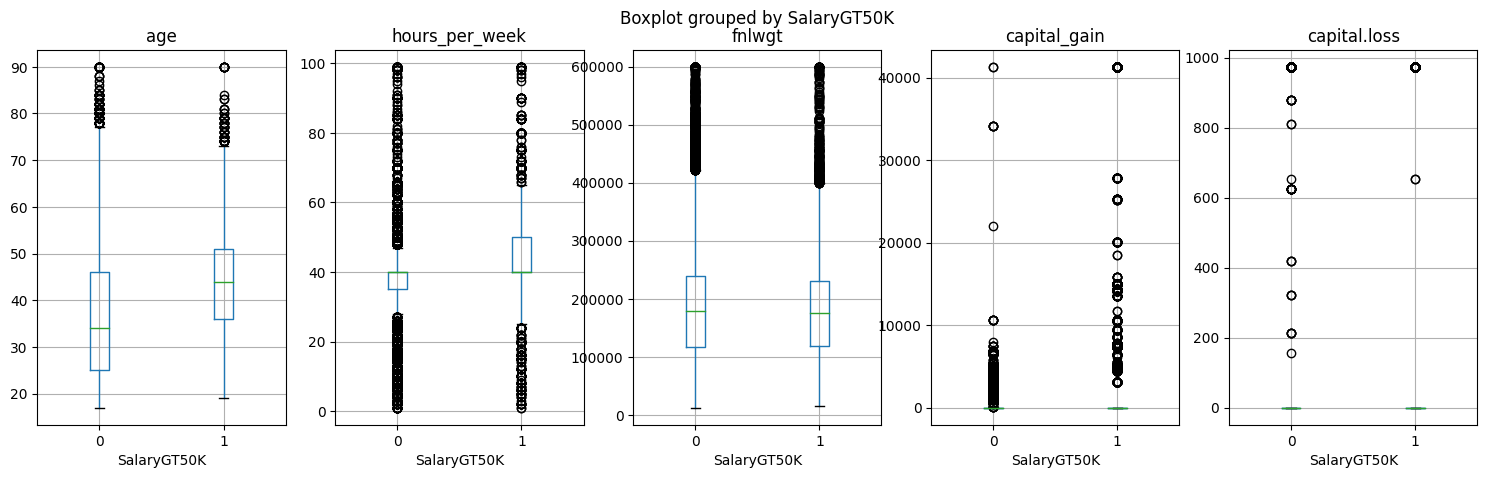

In [ ]:
BoxPlotCol=['age','hours_per_week','fnlwgt','capital_gain','capital.loss']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1,ncols=len(BoxPlotCol),figsize=(18,5))
for PredictorCol , Colnumber in zip(BoxPlotCol, range(len(BoxPlotCol))):
  SalaryData.boxplot(column=PredictorCol, by='SalaryGT50K', figsize=(5,5),vert=True,ax=PlotCanvas[Colnumber])

**Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

In [ ]:
def FunctionAnova(inpData, TargetVar, PredictorList):
  from scipy.stats import f_oneway
  SelPredictorList=[]

  print('Anova Results \n')
  for i in PredictorList:
    PredictorList=inpData.groupby(TargetVar)[i].apply(list)
    AnovaResult =f_oneway(*PredictorList)

    if(AnovaResult[1]<0.05):
      print(i,'is correlted with',TargetVar,'|P-Value:',AnovaResult[1])
      SelPredictorList.append(i)

    else:
      print(i,'is not correlated with',TargetVar,'|P-Value:',AnovaResult[1])

  return(SelPredictorList)


In [ ]:
ContinuousVariables=['age','hours_per_week','fnlwgt','capital_gain','capital.loss']
FunctionAnova(inpData=SalaryData, TargetVar='SalaryGT50K',PredictorList=ContinuousVariables)

Anova Results 

age is correlted with SalaryGT50K |P-Value: 0.0
hours_per_week is correlted with SalaryGT50K |P-Value: 0.0
fnlwgt is not correlated with SalaryGT50K |P-Value: 0.10034099994119691
capital_gain is correlted with SalaryGT50K |P-Value: 0.0
capital.loss is correlted with SalaryGT50K |P-Value: 4.266838502495211e-143


['age', 'hours_per_week', 'capital_gain', 'capital.loss']

## **Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts**

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

**Selected Column are:** 'age', 'hours_per_week', 'capital_gain', 'capital.loss'



In [ ]:
CrossTabulationData=pd.crosstab(index=SalaryData['marital_status'],columns=SalaryData['SalaryGT50K'])
CrossTabulationData
#Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.

SalaryGT50K,0,1
marital_status,,
Divorced,3978,463
Married-AF-spouse,13,10
Married-civ-spouse,8280,6690
Married-spouse-absent,384,34
Never-married,10176,491
Separated,959,66
Widowed,908,85


In [ ]:
CategoricalCols=['workclass', 'education', 'marital_status','occupation','relationship', 'race', 'sex']

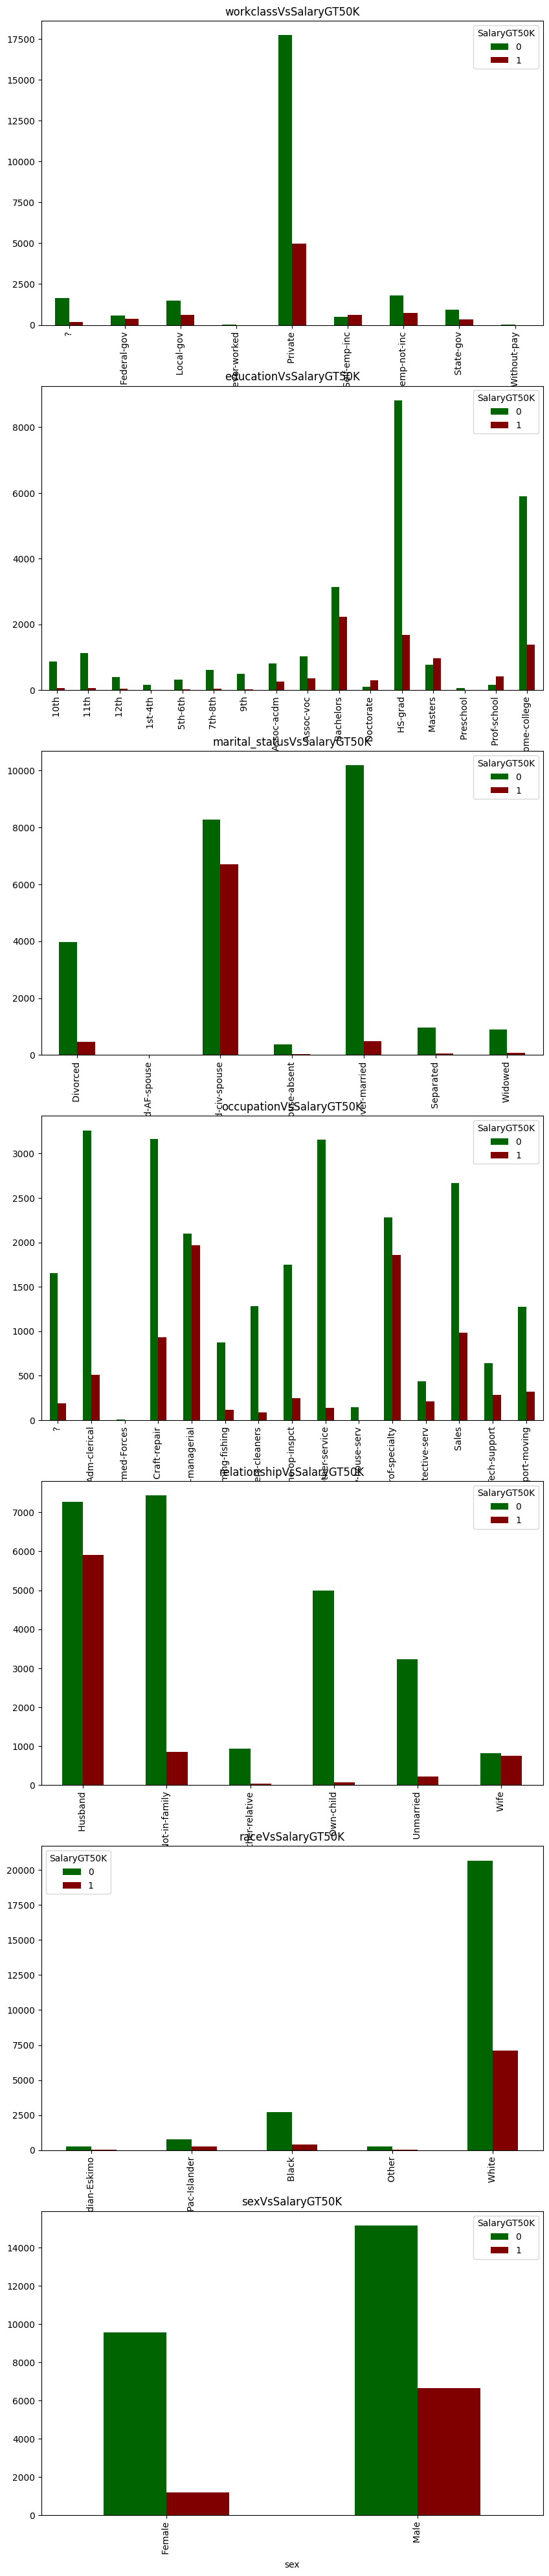

In [ ]:
import matplotlib.pyplot as plt
fig,plotBarChart=plt.subplots(nrows=len(CategoricalCols),ncols=1,figsize=(10,50))

for ColName, mynum in zip(CategoricalCols, range(len(CategoricalCols))):
  CrossTabulationData=pd.crosstab(index=SalaryData[ColName],columns=SalaryData['SalaryGT50K'])
  CrossTabulationData.plot.bar(color=['darkgreen', 'maroon'],ax=plotBarChart[mynum], title=ColName+'Vs'+'SalaryGT50K')


Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test


Chi-Square test is conducted to check the correlation between two categorical variables:


* Assumption(H0): The two columns are NOT related to each other

* Result of Chi-Sq Test: The Probability of H0 being True

In [ ]:
from scipy.stats import chisquare
def FunChisq(inpData, TargetVariable, CategoricalList):
  from scipy.stats import chi2_contingency

  SelectedPredictors=[]

  for predictor in CategoricalList:
    CrossTabResult=pd.crosstab(index=inpData[TargetVariable],columns=inpData[predictor])
    ChiSqOutput=chi2_contingency(CrossTabResult)

    if (ChiSqOutput[1]<0.05):
      print(predictor, 'is correlated with',TargetVariable,'|P-Value:',ChiSqOutput[1])
      SelectedPredictors.append(predictor)

    else:
      print(predictor,'is not correlated with',TargetVariable,'|P-Value:',ChiSqOutput[1])

  return(SelectedPredictors)


In [ ]:
CategoricalList=['workclass', 'education', 'marital_status','occupation',
                    'relationship', 'race', 'sex']

In [ ]:
FunChisq(inpData=SalaryData,
         TargetVariable='SalaryGT50K',
         CategoricalList=CategoricalList)

workclass is correlated with SalaryGT50K |P-Value: 3.352256069028484e-220
education is correlated with SalaryGT50K |P-Value: 0.0
marital_status is correlated with SalaryGT50K |P-Value: 0.0
occupation is correlated with SalaryGT50K |P-Value: 0.0
relationship is correlated with SalaryGT50K |P-Value: 0.0
race is correlated with SalaryGT50K |P-Value: 2.2797874171824478e-70
sex is correlated with SalaryGT50K |P-Value: 0.0


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [ ]:
SalaryData.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital.loss', 'hours_per_week', 'native_country',
       'SalaryGT50K'],
      dtype='object')

Instead of original "education" column, I am selecting the "education_num". Which represents the ***ordinal property*** of the data.

In [ ]:
SelectedColumns=['workclass', 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race', 'sex','age', 'hours_per_week',
                 'capital_gain', 'capital.loss']

DataForML=SalaryData[SelectedColumns]
DataForML.head()

,workclass,education_num,marital_status,occupation,relationship,race,sex,age,hours_per_week,capital_gain,capital.loss
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,39,40,2174,0
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,13,0,0
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,38,40,0,0
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,53,40,0,0
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,28,40,0,0


In [ ]:
SelectedColumns=['workclass', 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race', 'sex','age', 'hours_per_week',
                 'capital_gain', 'capital.loss']


In [ ]:
DataForML=SalaryData[SelectedColumns]
DataForML.head(10)

,workclass,education_num,marital_status,occupation,relationship,race,sex,age,hours_per_week,capital_gain,capital.loss
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,39,40,2174,0
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,13,0,0
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,38,40,0,0
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,53,40,0,0
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,28,40,0,0
5,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,37,40,0,0
6,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,49,16,0,0
7,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,52,45,0,0
8,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,31,50,14084,0
9,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,42,40,5178,0


In [ ]:
SalaryData.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [ ]:
DataForML.to_pickle('DataForML.pkl')

Data Pre-processing for Machine Learning



In this data there is no Ordinal categorical variable.

## **Converting the binary nominal variable to numeric using 1/0 mapping**

In [ ]:
DataForML['sex'].unique()

array([' Male', ' Female'], dtype=object)

### **Converting the nominal variable to numeric using get_dummies()**

In [ ]:
DataForML['sex'].replace({' Male':1, ' Female':0},inplace=True)
DataForML['sex']

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32537, dtype: int64

In [ ]:
DataForML_Numeric=pd.get_dummies(DataForML)

In [ ]:
DataForML_Numeric['SalaryGT50K']=SalaryData['SalaryGT50K']

In [ ]:
DataForML_Numeric.head()

,education_num,sex,age,hours_per_week,capital_gain,capital.loss,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,SalaryGT50K
0,13,1,39,40,2174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13,1,50,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,1,38,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,1,53,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,13,0,28,40,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## **Machine Learning: Splitting the data into Training and Testing sample**

In [ ]:
DataForML_Numeric.shape[1]

49

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
DataForML_Numeric.columns

Index(['education_num', 'sex', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       '

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='SalaryGT50K'
Predictors=['education_num', 'sex', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White']


X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22775, 48)
(22775,)
(9762, 48)
(9762,)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7405
           1       0.73      0.61      0.66      2357

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.78      9762
weighted avg       0.84      0.85      0.85      9762

[[6871  534]
 [ 923 1434]]
Accuracy of the model on Testing Sample Data: 0.85

Accuracy values for 10-fold Cross Validation:
 [0.84064533 0.84349705 0.84786099 0.83629089 0.85168839 0.84589346
 0.84651952 0.85184685 0.84881499 0.84411956]

Final Average Accuracy of the model: 0.85


DecisionTreeClassifier(criterion='entropy', max_depth=6)
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7405
           1       0.79      0.51      0.62      2357

    accuracy                           0.85      9762
   macro avg       0.83      0.73      0.76      9762
weighted avg       0.84      0.85      0.84      9762

[[7085  320]
 [1150 1207]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.82584983 0.8314983  0.84011881 0.82143881 0.83438495 0.83595917
 0.83457367 0.84327588 0.84346451 0.82980782]

Final Average Accuracy of the model: 0.83


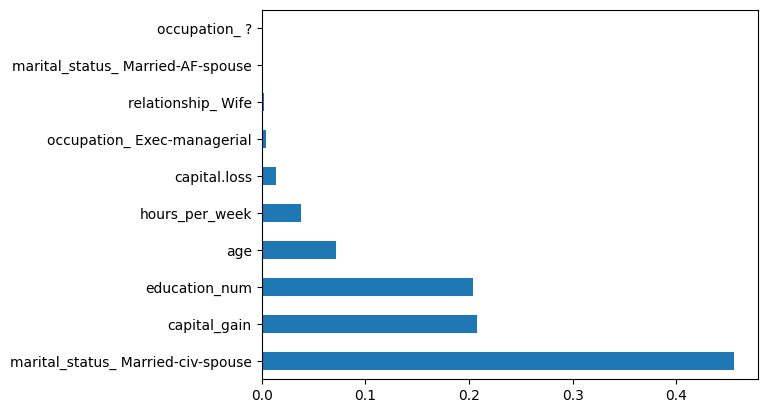

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')

print(clf)

DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Deployment of the Model

In [ ]:
TargetVariable='SalaryGT50K'

Predictors=['education_num', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed']



X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(32537, 12)
(32537,)


Step 1. Retraining the model using 100% data

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

FinalLogisticModel=clf.fit(X,y)

Cross validating the final model accuracy with less predictors

In [ ]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(FinalLogisticModel, X , y, cv=10, scoring='f1_weighted')

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.82844418 0.82843153 0.8417561  0.82593716 0.8349986  0.83662039
 0.83169735 0.84637467 0.83841333 0.83696558]

Final Average Accuracy of the model: 0.83


Step 2. Save the model

In [ ]:
import pickle
import os

with open('FinalLogisticModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalLogisticModel, fileWriteStream)

    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


Step 3. Create a python function

In [ ]:
def PredictSalaryBand(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)

    InputData=pd.get_dummies(InputData)

    Predictors=['education_num', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss',   'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed']


    X=InputData[Predictors].values[0:Num_Inputs]

    X=PredictorScalerFit.transform(X)

    import pickle
    with open('FinalLogisticModel.pkl', 'rb') as fileReadStream:
        LogisticModel=pickle.load(fileReadStream)
        fileReadStream.close()

    Prediction=LogisticModel.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [ ]:
NewEmployeeDetails=pd.DataFrame(
data=[[39,13,40,15024,0,'Never-married'],
     [39,13,40,2174,0,'Never-married']],
columns=['age', 'education_num', 'hours_per_week','capital_gain', 'capital.loss', 'marital_status'])

print(NewEmployeeDetails)

PredictSalaryBand(InputData= NewEmployeeDetails)


   age  education_num  hours_per_week  capital_gain  capital.loss  \
0   39             13              40         15024             0   
1   39             13              40          2174             0   

  marital_status  
0  Never-married  
1  Never-married  


,Predicted Status
0,1
1,0
